# $\beta$-Skeleton Graph


## How to get the NGL library
Visit http://www.ngraph.org/

```
Carlos D. Correa and Peter Lindstorm,
"Towards Robust Topology of Sparsely Sampled Data".
IEEE Transactions on Visualization and Computer Graphics 17, 12 (December 2011), 1852-1861. 
```     
        
## Using the NGL Library

After installing the NGL library, it can be called from a Makefile in the terminal. There are many other methods available (Gabriel Graph, Delaunay, Beta-Skeleton). Here I used the BSkeleton Method. Requirements:

* An input file: They may be N-dimentional files, one position per row, one column per dimension space separated.
* Number of dimentions DIM
* The $\beta$ parameter. Do not forget: $\beta \geq 0$.
* The full path to the NGL executables directory.
* Output name. **Double counting is not taken into account**.


Ref: The `code/Makefile` in https://github.com/forero/BetaSkeleton 
	
### Makefile Content
```cmake
EXEC_PATH=/home/filipo/master_thesis/ngl-beta/build/bindsrc/
METHOD=BSkeleton
DIM=3
BETA=1.7
FILE_NGL=test_in
FILE_SKEL=test_out

$(EXEC_PATH)/.getNeighborGraph -i $(FILE_NGL) -d $(DIM) -b $(BETA) -m $(METHOD) > $(FILE_SKEL)

clean:
    rm $(FILE_SKEL)
```

### Input file

test_in has 50 points. `head test` throws:
```
1.137083 8.652601 6.859905
3.955215 5.755749 7.952224
7.384028 6.253537 0.336758
6.165400 6.837009 0.020846
4.791396 8.459441 5.989693
9.981390 4.886085 0.823814
5.248893 4.505306 8.047767
9.850018 3.872629 8.740297
1.551854 2.627437 7.581902
8.309014 4.741383 2.560556
```

### Output File

It has the pair of points connected with this $\beta$ value. The first 10 lines of the output file are:
```
0 10
0 35
1 26
1 31
1 6
2 14
2 3
3 2
3 37
3 30
```

# The Graphs

Here we go!

In [1]:
%pylab inline

from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = "test_in"

data = np.loadtxt(filename)

In [3]:
x = data[:,0]
y = data[:,1]
z = data[:,2]

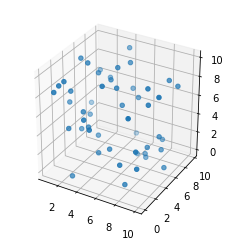

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z)

In [5]:
filename = "test_out"
beta_skeleton = np.loadtxt(filename)

beta_skeleton.shape

(164, 2)

In [6]:
data.shape

(50, 3)

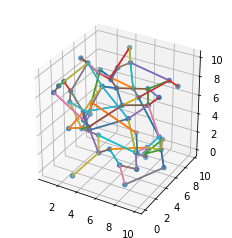

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

BS_size = beta_skeleton.shape[0]

ax.scatter(x, y, z)

for n in range(BS_size):
    i, j = beta_skeleton[n]
    
    i = int(i)
    j = int(j)
    
    ax.plot([x[i], x[j]], [y[i],y[j]], zs=[z[i],z[j]])
    